In [1]:
import pandas as pd
import numpy as np

In [10]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [11]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


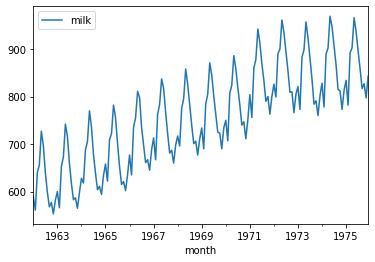

In [12]:
milk.plot()

In [13]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [14]:
milk.head(20)

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
1962-06-01,697
1962-07-01,640
1962-08-01,599
1962-09-01,568


In [15]:
import calendar

In [16]:
days = []
for i in milk.index:
    days.append(calendar.monthrange(i.year, i.month)[1])
    
milk['avgmilk'] = milk['milk']/days
milk

,milk,avgmilk
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,27.233333
1975-10-01,827,26.677419


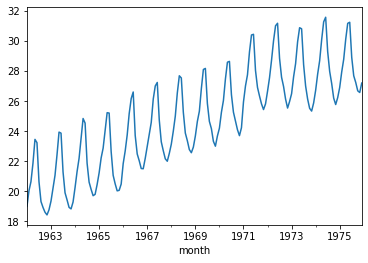

In [18]:
milk['avgmilk'].plot()

In [47]:
milk.sum()

milk    4166.326662
dtype: float64

In [21]:
milk.avgmilk - milk.avgmilk.shift(1)

month
1962-01-01         NaN
1962-02-01    1.035714
1962-03-01    0.609447
1962-04-01    1.221505
1962-05-01    1.584946
                ...   
1975-08-01   -1.225806
1975-09-01   -0.444086
1975-10-01   -0.555914
1975-11-01   -0.110753
1975-12-01    0.626882
Name: avgmilk, Length: 168, dtype: float64

In [22]:
milk['daily_diff1'] = milk.avgmilk - milk.avgmilk.shift(1)
milk

,milk,avgmilk,daily_diff1
month,,,
1962-01-01,589,19.000000,NaN
1962-02-01,561,20.035714,1.035714
1962-03-01,640,20.645161,0.609447
1962-04-01,656,21.866667,1.221505
1962-05-01,727,23.451613,1.584946
...,...,...,...
1975-08-01,858,27.677419,-1.225806
1975-09-01,817,27.233333,-0.444086
1975-10-01,827,26.677419,-0.555914


In [23]:
milk['daily_diff12'] = milk.avgmilk - milk.avgmilk.shift(12)
milk

,milk,avgmilk,daily_diff1,daily_diff12
month,,,,
1962-01-01,589,19.000000,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN
1962-03-01,640,20.645161,0.609447,NaN
1962-04-01,656,21.866667,1.221505,NaN
1962-05-01,727,23.451613,1.584946,NaN
...,...,...,...,...
1975-08-01,858,27.677419,-1.225806,-0.290323
1975-09-01,817,27.233333,-0.444086,0.066667
1975-10-01,827,26.677419,-0.555914,0.483871


In [27]:
milk['daily_diff12and1'] = milk.daily_diff12 - milk.daily_diff12.shift(1)
milk

,milk,avgmilk,daily_diff1,daily_diff12,daily_diff12and1
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN,NaN
1962-03-01,640,20.645161,0.609447,NaN,NaN
1962-04-01,656,21.866667,1.221505,NaN,NaN
1962-05-01,727,23.451613,1.584946,NaN,NaN
...,...,...,...,...,...
1975-08-01,858,27.677419,-1.225806,-0.290323,0.096774
1975-09-01,817,27.233333,-0.444086,0.066667,0.356989
1975-10-01,827,26.677419,-0.555914,0.483871,0.417204


In [29]:
print(sm.tsa.stattools.adfuller(milk.avgmilk)[1])
print(sm.tsa.stattools.adfuller(milk.daily_diff1[1:])[1])
print(sm.tsa.stattools.adfuller(milk.daily_diff12[12:])[1])
print(sm.tsa.stattools.adfuller(milk.daily_diff12and1[13:])[1])

0.682215151308144
0.06430054654174293
0.22127672658830383
2.2808455518036712e-06


In [32]:
milk.daily_diff12and1[13:].values.squeeze()

array([-0.17626728,  0.24078341,  0.14731183, -0.0827957 ,  0.14946237,
        0.01182796, -0.06451613, -0.08064516, -0.17741935,  0.07741935,
        0.11612903,  0.38709677,  0.19283331,  0.03297314, -0.06236559,
       -0.16344086, -0.23655914, -0.08602151,  0.12903226, -0.00967742,
        0.07419355,  0.19247312,  0.19462366, -0.19354839, -0.06380105,
       -0.22652153, -0.11075269, -0.17956989,  0.27956989,  0.10752688,
       -0.32258065, -0.08494624, -0.04408602, -0.05591398, -0.2344086 ,
        0.58064516, -0.14861751,  0.40668203,  0.22903226, -0.16451613,
        0.46451613, -0.33548387,  0.35483871,  0.11397849, -0.04946237,
       -0.05053763,  0.27634409, -0.5483871 , -0.01843318, -0.30414747,
        0.12795699, -0.12795699, -0.20537634,  0.39892473, -0.22580645,
       -0.13978495, -0.02150538, -0.14516129, -0.17741935, -0.19354839,
        0.04953917,  0.24078341, -0.01935484,  0.27741935, -0.37741935,
        0.21612903,  0.06451613,  0.08602151, -0.05376344, -0.04

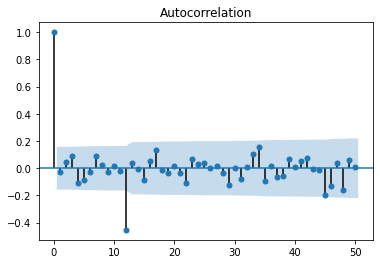

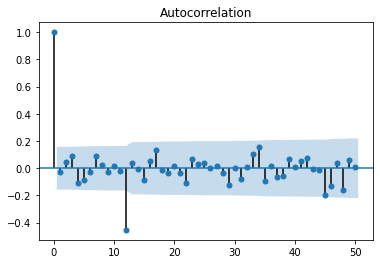

In [33]:
sm.graphics.tsa.plot_acf(milk.daily_diff12and1[13:].values.squeeze(), lags=50)

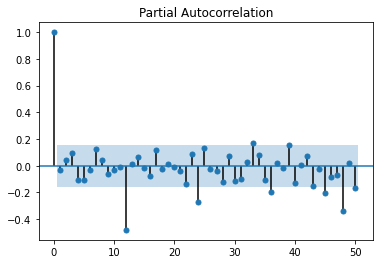

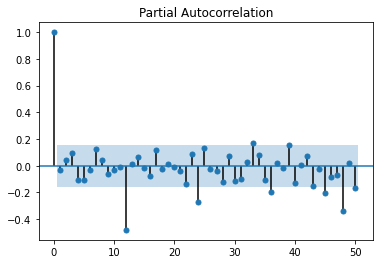

In [39]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12and1[13:].values.squeeze(), lags=50)

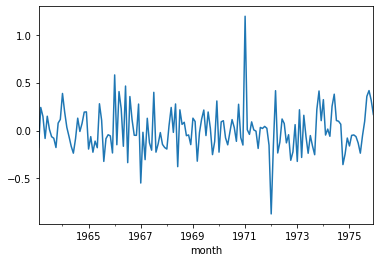

In [44]:
milk['daily_diff12and1'][13:].plot()

In [41]:
milk.daily_diff12and1[13:]

month
1963-02-01   -0.176267
1963-03-01    0.240783
1963-04-01    0.147312
1963-05-01   -0.082796
1963-06-01    0.149462
                ...   
1975-08-01    0.096774
1975-09-01    0.356989
1975-10-01    0.417204
1975-11-01    0.316129
1975-12-01    0.167742
Name: daily_diff12and1, Length: 155, dtype: float64

In [42]:
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(milk.daily_diff12and1[13:])
train, test = milk.daily_diff12and1[13:][0:100], milk.daily_diff12and1[13:][100:155]
train.shape
test.shape
plt.plot(train)
plt.plot(test)
plt.title("Training and Test Data")
plt.show()

ModuleNotFoundError: No module named 'pyramid'

In [48]:
?sm.tsa.statespace.SARIMAX

In [67]:
model=sm.tsa.statespace.SARIMAX(endog=milk.daily_diff12and1[13:],order=(1,1,1),seasonal_order=(1,0,1,12),enforce_invertibility=False)
results=model.fit()
print(results.summary())

D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\AdditionalProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                   daily_diff12and1   No. Observations:                  155
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  30.082
Date:                            Sun, 06 Sep 2020   AIC                            -50.165
Time:                                    03:32:40   BIC                            -34.980
Sample:                                02-01-1963   HQIC                           -43.997
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0082      0.088     -0.093      0.926      -0.181       0.165
ma.L1         -1.0000    106.701   

In [75]:
df = pd.read_csv('WAG_C_M.csv', sep=';', index_col=['month'], parse_dates=['month'], dayfirst=True)
df

,WAG_C_M
month,
1993-01-01,15.3
1993-02-01,19.1
1993-03-01,23.6
1993-04-01,30.6
1993-05-01,37.5
...,...
2016-04-01,36497.0
2016-05-01,37270.0
2016-06-01,38447.0


In [ ]:
df